<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №2: Логистическая и линейная регрессия

## Задача классификации

### 2. Создание бейзлайна и оценка качества

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [4]:
#Проверяем общее количество пропусков
total_missing = df.isnull().sum().sum()
print(f"Всего пропущенных значенийй: {total_missing}")

#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()

Всего пропущенных значенийй: 8

Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


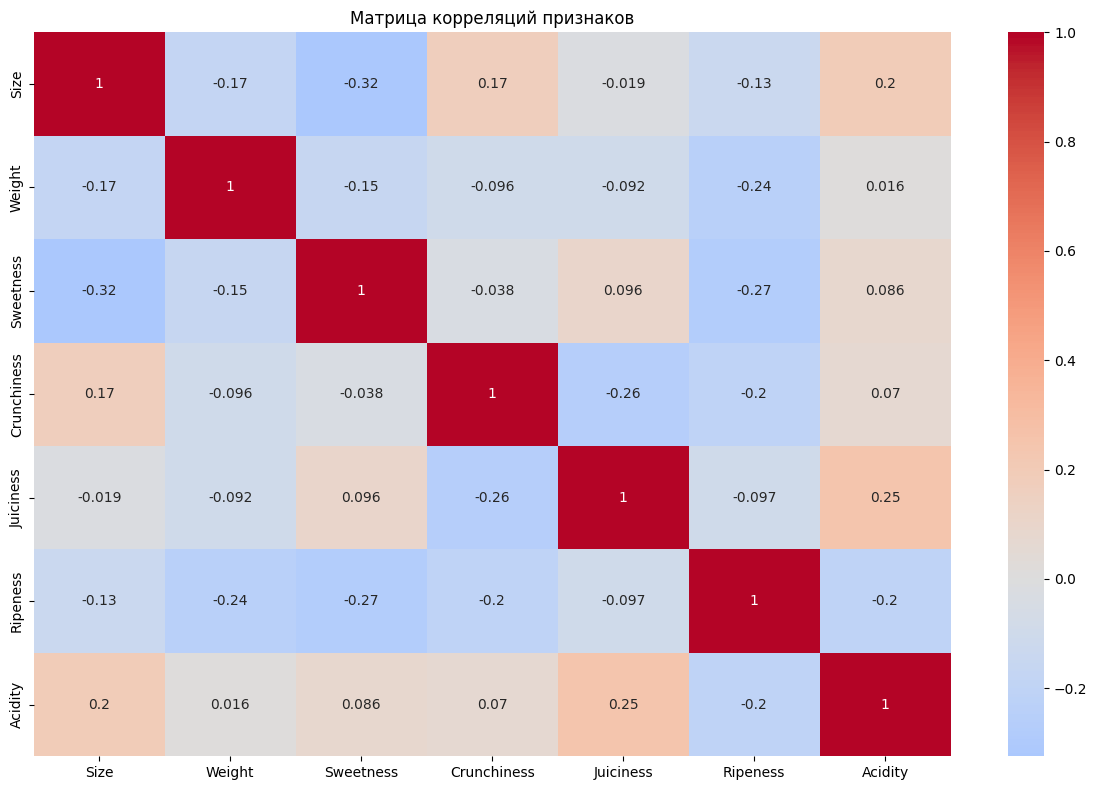

In [5]:
#Матрица корреляций
plt.figure(figsize=(12, 8))
numeric_df = df.drop(['A_id', 'Quality'], axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()

In [6]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [7]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [8]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [9]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Бейзлайн модель и предсказания
base_model = LogisticRegression()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


Logistic Baseline:
Accuracy: 0.7450
Precision: 0.7462
Recall: 0.7450
F1-score: 0.7447


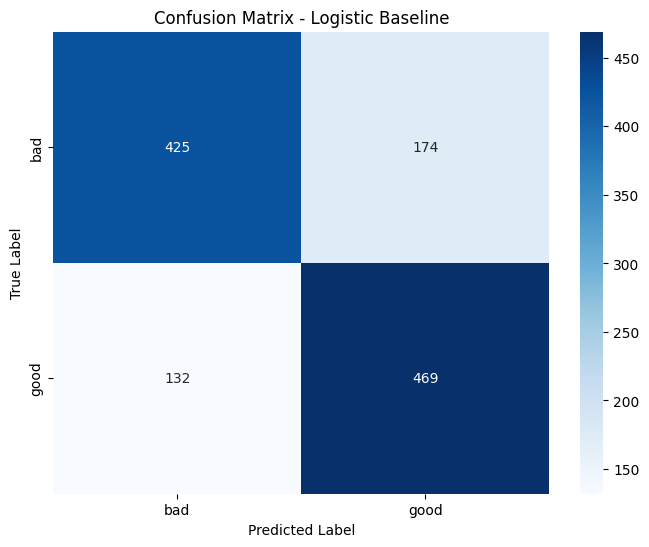

In [ ]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
results = evaluate_model(y_test, y_pred, "Logistic Baseline")

### 3. Улучшение бейзлайна

Гипотеза 1: Мастабирование данных

Гипотеза 2: подбор гиперпараметров с кросс-валидацией

Гипотеза 3: увеличение количества признаков с помощью полиномиального преобразования

In [ ]:
#Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Модель с масштабированными признаками
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_scaled):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_scaled):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_scaled):.4f}")

Accuracy: 0.7442
Precision: 0.7283
Recall: 0.7804
F1-score: 0.7534


In [ ]:
#Создание полиномиальных признаков 2-й степени
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"\nРазмерность данных до полиномиального преобразования: {X_train_scaled.shape}")
print(f"Размерность данных после полиномиального преобразования: {X_train_poly.shape}")


Размерность данных до полиномиального преобразования: (2800, 7)
Размерность данных после полиномиального преобразования: (2800, 35)


In [ ]:
#Модель с полиномиальными признаками
model_poly = LogisticRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_poly):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_poly):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_poly):.4f}")

Accuracy: 0.8567
Precision: 0.8432
Recall: 0.8769
F1-score: 0.8597


In [ ]:
#Подбор гиперпараметров с кросс-валидацией
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_poly, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший F1-score на кросс-валидации: {grid_search.best_score_:.4f}")

#Модель с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_poly)

Лучшие параметры: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Лучший F1-score на кросс-валидации: 0.8731



Logistic Improved:
Accuracy: 0.8575
Precision: 0.8581
Recall: 0.8575
F1-score: 0.8574


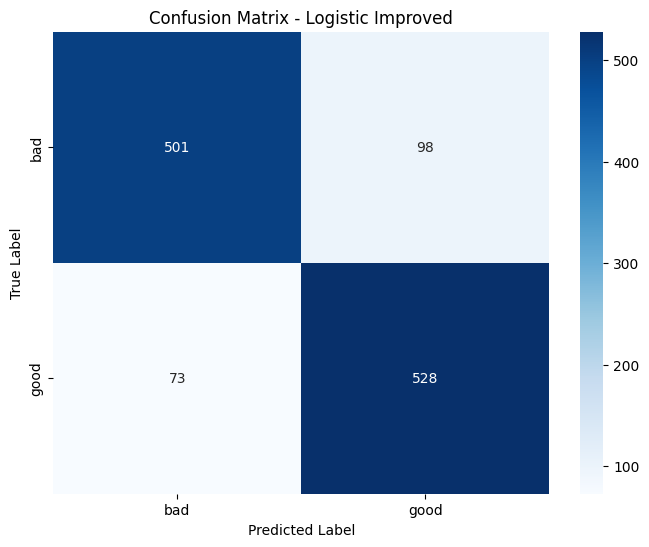

In [ ]:
improved_results = evaluate_model(y_test, y_pred_best, "Logistic Improved")

In [ ]:
#Сводная таблица результатов
results_summary = pd.DataFrame({
    'Модель': ['Базовая', 'С масштабированием', 'С полиномиальными признаками','С подбором параметров', ],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_scaled),
        accuracy_score(y_test, y_pred_poly),
        accuracy_score(y_test, y_pred_best)

    ],
    'Precision': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_scaled),
        precision_score(y_test, y_pred_poly),
        precision_score(y_test, y_pred_best)

    ],
    'Recall': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_scaled),
        recall_score(y_test, y_pred_poly),
        recall_score(y_test, y_pred_best)

    ],
    'F1-score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_scaled),
        f1_score(y_test, y_pred_poly),
        f1_score(y_test, y_pred_best)

    ]
})

print(results_summary.to_string(index=False))

                      Модель  Accuracy  Precision   Recall  F1-score
                     Базовая  0.745000   0.729393 0.780366  0.754019
          С масштабированием  0.744167   0.728261 0.780366  0.753414
С полиномиальными признаками  0.856667   0.843200 0.876872  0.859706
       С подбором параметров  0.857500   0.843450 0.878536  0.860636


Наибольший вклад в улучшение качества классификации вносит добавление полиномиальных признаков, в то время как другие этапы дают незначительный эффект

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Создание собственной логистической регрессии
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=None, lambda_reg=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization  # 'l1' или 'l2'
        self.lambda_reg = lambda_reg
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        #Защита от переполнения
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        #Функция потерь с регуляризацией
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

        #Добавляем регуляризацию
        if self.regularization == 'l1': #Лассо
            loss += self.lambda_reg * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2': #Ридж
            loss += self.lambda_reg * np.sum(self.weights ** 2)

        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #Инициализация параметров
        self.weights = np.zeros(n_features)
        self.bias = 0

        #Градиентный спуск
        for i in range(self.n_iterations):
            #Прямое распространение
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            #Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            #Добавляем регуляризацию к градиентам
            if self.regularization == 'l1':
                dw += self.lambda_reg * np.sign(self.weights)
            elif self.regularization == 'l2':
                dw += 2 * self.lambda_reg * self.weights

            #Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            #Сохранение потерь для визуализации
            if i % 100 == 0:
                loss = self._compute_loss(y, y_pred)
                self.loss_history.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def get_params(self):
        return {'weights': self.weights, 'bias': self.bias}

In [ ]:
scaler_my = StandardScaler()
X_train_scaled_my = scaler_my.fit_transform(X_train)
X_test_scaled_my = scaler_my.transform(X_test)

In [ ]:
#Инициализация модели c baseline
my_model = MyLogisticRegression(learning_rate=0.1, n_iterations=100, regularization='l2', lambda_reg=1)
my_model.fit(X_train_scaled_my, y_train.values)

y_pred_my = my_model.predict(X_test_scaled_my)


Logistic My:
Accuracy: 0.6842
Precision: 0.6847
Recall: 0.6842
F1-score: 0.6839


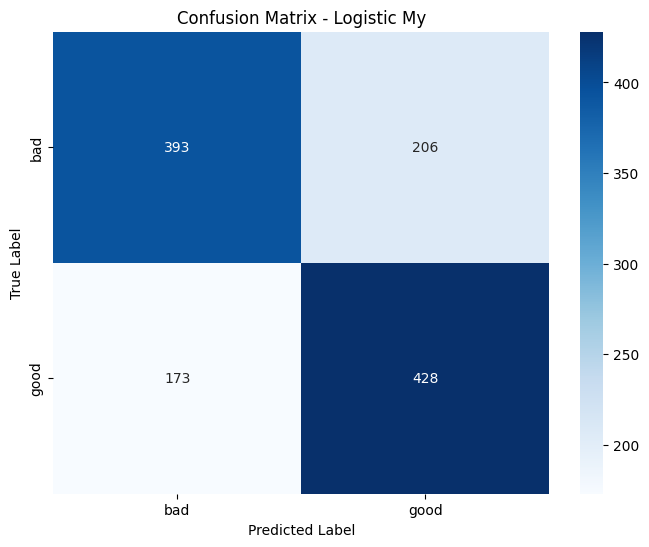

In [ ]:
my_results = evaluate_model(y_test, y_pred_my, "Logistic My")

In [ ]:
print("\nРазница в метриках (моя реализация - sklearn):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_my) - accuracy_score(y_test, y_pred):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_my) - precision_score(y_test, y_pred):.6f}")
print(f"Recall: {recall_score(y_test, y_pred_my) - recall_score(y_test, y_pred):.6f}")
print(f"F1-score: {f1_score(y_test, y_pred_my) - f1_score(y_test, y_pred):.6f}")


Разница в метриках (моя реализация - sklearn):
Accuracy: -0.060833
Precision: -0.054315
Recall: -0.068220
F1-score: -0.060902


При параметрах по умолчанию Бейзлайн логистической регрессии на 6% лучше, чем кастомная модель


Logistic My Impoved:
Accuracy: 0.8408
Precision: 0.8409
Recall: 0.8408
F1-score: 0.8408


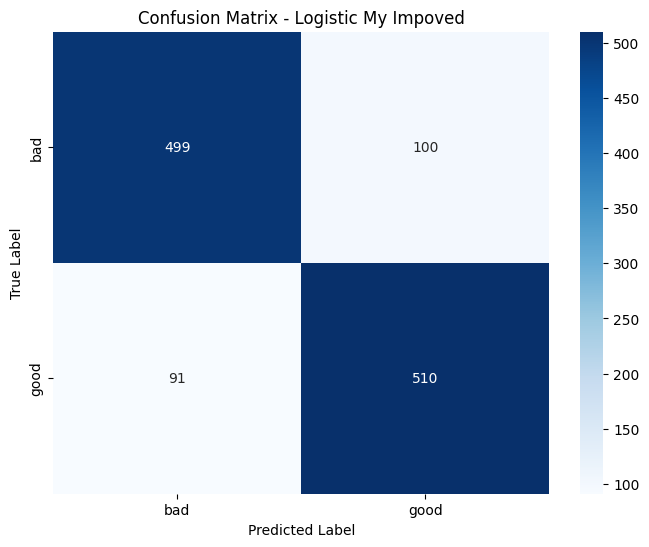

In [ ]:
#Инициализация модели c улучшенными техниками бейзлайна
my_model_poly = MyLogisticRegression(learning_rate=0.1, n_iterations=1000, regularization='l2', lambda_reg=0.1)
my_model_poly.fit(X_train_poly, y_train.values)

y_pred_my_poly = my_model_poly.predict(X_test_poly)

imp_my_results = evaluate_model(y_test, y_pred_my_poly, "Logistic My Impoved")

In [ ]:
#Сравнение всех метрик всех моделей
comparison_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline Logistic': [
        results['accuracy'],
        results['precision'],
        results['recall'],
        results['f1']
    ],
    'Improved Logistic': [
        improved_results['accuracy'],
        improved_results['precision'],
        improved_results['recall'],
        improved_results['f1']
    ],
    'My Logistic': [
        my_results['accuracy'],
        my_results['precision'],
        my_results['recall'],
        my_results['f1']
    ],
    'My Improved Logistic': [
        imp_my_results['accuracy'],
        imp_my_results['precision'],
        imp_my_results['recall'],
        imp_my_results['f1']
    ]
})

print(comparison_metrics.to_string(index=False))

   Metric  Baseline Logistic  Improved Logistic  My Logistic  My Improved Logistic
 Accuracy           0.745000           0.857500     0.684167              0.840833
Precision           0.746177           0.858112     0.684697              0.840906
   Recall           0.745000           0.857500     0.684167              0.840833
 F1-score           0.744672           0.857433     0.683913              0.840822


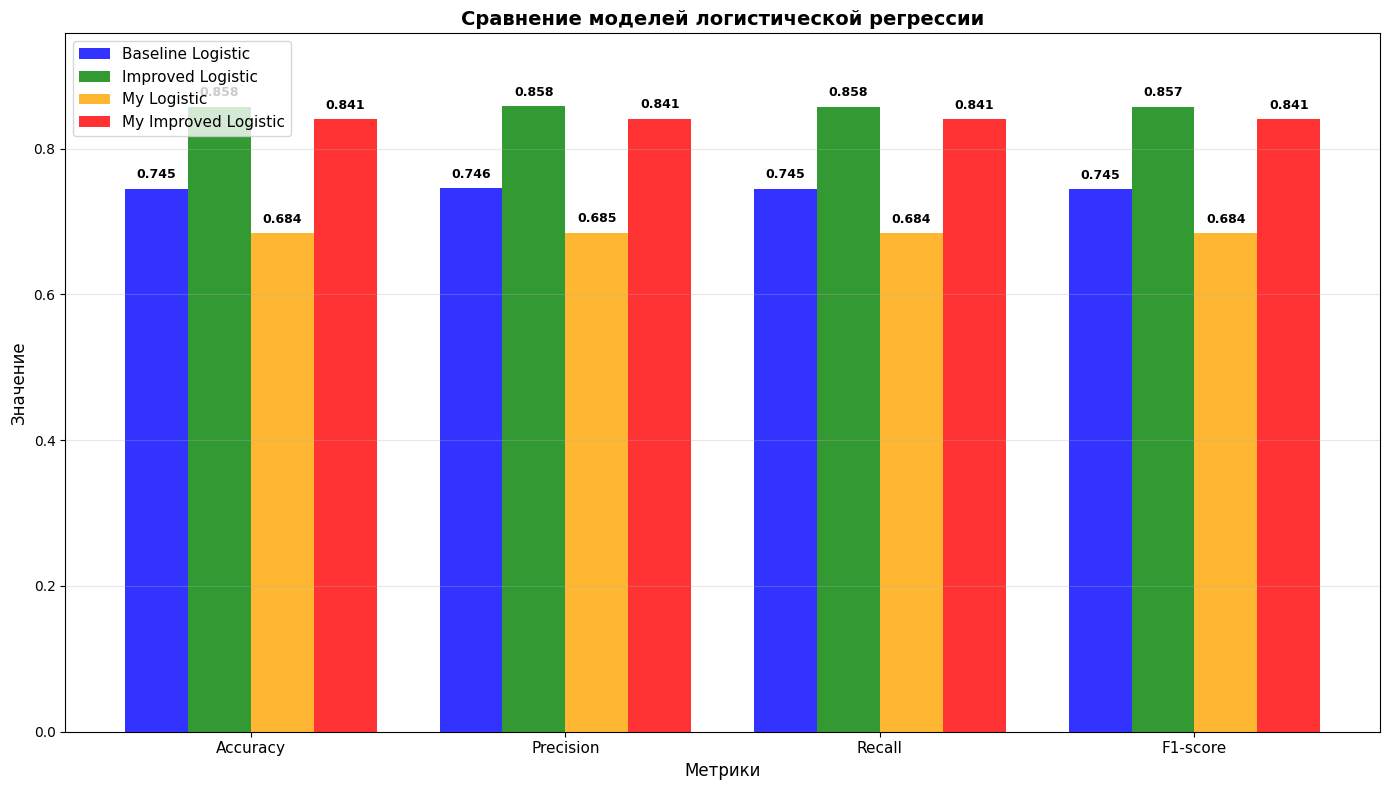

In [ ]:
#Визуализация сравнения
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_metrics))
width = 0.2

plt.bar(x - width*1.5, comparison_metrics['Baseline Logistic'], width,
        label='Baseline Logistic', alpha=0.8, color='blue')
plt.bar(x - width/2, comparison_metrics['Improved Logistic'], width,
        label='Improved Logistic', alpha=0.8, color='green')
plt.bar(x + width/2, comparison_metrics['My Logistic'], width,
        label='My Logistic', alpha=0.8, color='orange')
plt.bar(x + width*1.5, comparison_metrics['My Improved Logistic'], width,
        label='My Improved Logistic', alpha=0.8, color='red')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение моделей логистической регрессии', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_metrics['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

#Добавляем значения над столбцами
for i in range(len(comparison_metrics)):
    plt.text(i - width*1.5, comparison_metrics['Baseline Logistic'][i] + 0.01,
             f'{comparison_metrics["Baseline Logistic"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i - width/2, comparison_metrics['Improved Logistic'][i] + 0.01,
             f'{comparison_metrics["Improved Logistic"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width/2, comparison_metrics['My Logistic'][i] + 0.01,
             f'{comparison_metrics["My Logistic"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width*1.5, comparison_metrics['My Improved Logistic'][i] + 0.01,
             f'{comparison_metrics["My Improved Logistic"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настраиваем пределы оси Y
max_val = max([comparison_metrics['Baseline Logistic'].max(), comparison_metrics['Improved Logistic'].max(), comparison_metrics['My Logistic'].max(), comparison_metrics['My Improved Logistic'].max()]) + 0.1
plt.ylim(0, min(max_val, 1.0))

plt.tight_layout()
plt.show()

Improved Logistic демонстрирует наилучшую точность (85,75%). При этом базовая модель (Baseline Logistic) существенно отстает по точности (74.5%), что подчеркивает важность предобработки данных и настройки гиперпараметров. Собственная реализация алгоритма демонстрирует близкие к библиотечной реализации результаты, что подтверждает ее корректность.

Собственная реализация алгоритма (My Logistic) в своей базовой версии показывает результат ниже (68,42%), чем библиотечный аналог. Однако после применения аналогичных улучшающих техник (My Improved Logistic) ее метрики значительно возрастают (до 84,08%), практически достигая уровня оптимизированной библиотечной модели.

## Задача регресии

### 2. Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
df = pd.read_csv('pizza_dataset.csv')
df.head(5)

,id,date,time,name,size,type,price,diameter_cm,weight_g,calories_per_100g,...,cheese_percent,crust_type,sauce_type,filling_density,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,29.498160,457.825488,279.125963,...,30.701562,regular,tomato,regular,683.061055,0.670256,1277.909802,0.309009,13.105430,50.00
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,31.802857,481.340835,250.388400,...,16.691659,regular,tomato,regular,793.966056,0.606249,1205.221616,0.324397,6.232590,43.25
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,30.927976,439.468001,222.409110,...,20.847359,regular,bbq,medium,750.883653,0.585268,977.416871,0.353923,11.377393,48.75
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,36.394634,559.697009,248.607456,...,23.454774,regular,spicy_asian,regular,1039.786963,0.538280,1391.448496,0.384982,8.933405,59.50
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,34.624075,568.288698,219.772790,...,39.873953,regular,tomato,medium,941.078833,0.603869,1248.943927,0.205297,10.558014,54.25


In [ ]:
df.describe()

,price,diameter_cm,weight_g,calories_per_100g,ingredient_count,complexity_score,cook_time_min,ingredient_cost,popularity_score,spiciness,cheese_percent,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
count,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000
mean,16.497762,30.690807,519.536413,280.118177,4.589321,4.715436,14.003510,10.670071,7.557020,1.641062,25.094816,760.464989,0.726839,1466.373133,0.337399,9.308713,49.368757
std,3.621954,5.178817,105.254349,41.468638,1.261791,1.584733,2.674232,2.130618,1.143916,0.848082,6.607897,248.667386,0.168644,411.329991,0.099527,3.600500,6.464381
min,9.750000,22.000067,221.577230,167.018611,3.000000,2.000000,4.661094,3.571696,3.215589,1.000000,15.000000,379.942312,0.348741,438.197968,0.108497,3.599621,28.250000
25%,12.750000,25.457615,441.250844,250.983063,4.000000,4.000000,12.131075,9.164775,6.747760,1.000000,19.920477,508.750760,0.602715,1168.892845,0.265424,6.697684,44.750000
50%,16.500000,30.647272,518.115671,280.101598,5.000000,5.000000,14.068492,10.624668,7.496350,1.000000,24.703116,737.315394,0.695078,1432.259760,0.334680,8.557001,49.250000
75%,20.250000,35.503520,595.925838,310.706355,5.000000,6.000000,15.893498,12.129966,8.320789,2.000000,29.665115,989.492420,0.829394,1725.405439,0.404105,11.190773,54.000000
max,35.950000,49.982993,853.363727,425.023101,8.000000,8.000000,24.361009,19.520416,10.000000,4.000000,50.000000,1961.165170,1.393794,3364.563092,0.869375,32.349101,72.750000


In [ ]:
#Идентификация категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_cols}")

#Изучим уникальные значения в каждом категориальном признаке
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных значений: {unique_vals}")

Категориальные признаки: ['id', 'date', 'time', 'name', 'size', 'type', 'crust_type', 'sauce_type', 'filling_density']

id:
  Уникальных значений: 21350

date:
  Уникальных значений: 358

time:
  Уникальных значений: 16382

name:
  Уникальных значений: 32

size:
  Уникальных значений: 5

type:
  Уникальных значений: 4

crust_type:
  Уникальных значений: 5

sauce_type:
  Уникальных значений: 6

filling_density:
  Уникальных значений: 3


In [ ]:
#Обработка категориальных признаков
df_processed = df.copy()

#Удаляем исходные столбцы date, time и id
df_processed = df_processed.drop(['date', 'time', 'id'], axis=1)

#One-Hot для основных категориальных признаков
categorical_to_encode = ['size', 'type', 'crust_type', 'sauce_type', 'filling_density']

#Для name используем частотное кодирование, так как много уникальных значений
name_freq = df_processed['name'].value_counts(normalize=True)
df_processed['name_freq'] = df_processed['name'].map(name_freq)
df_processed = df_processed.drop('name', axis=1)

#One-Hot для остальных категориальных признаков
df_processed = pd.get_dummies(df_processed, columns=categorical_to_encode, drop_first=True)

print(f"Количество признаков после One-Hot Encoding: {df_processed.shape[1]}")

Количество признаков после One-Hot Encoding: 36


In [ ]:
#Обработка пропусков
missing_values = df_processed.isnull().sum()

if missing_values.sum() == 0:
    print("Пропусков в данных нет")
else:
    #Заполняем пропуски медианой для числовых и модой для категориальных
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype in ['int64', 'float64']:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
            else:
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    print("Пропуски обработаны")

Пропусков в данных нет


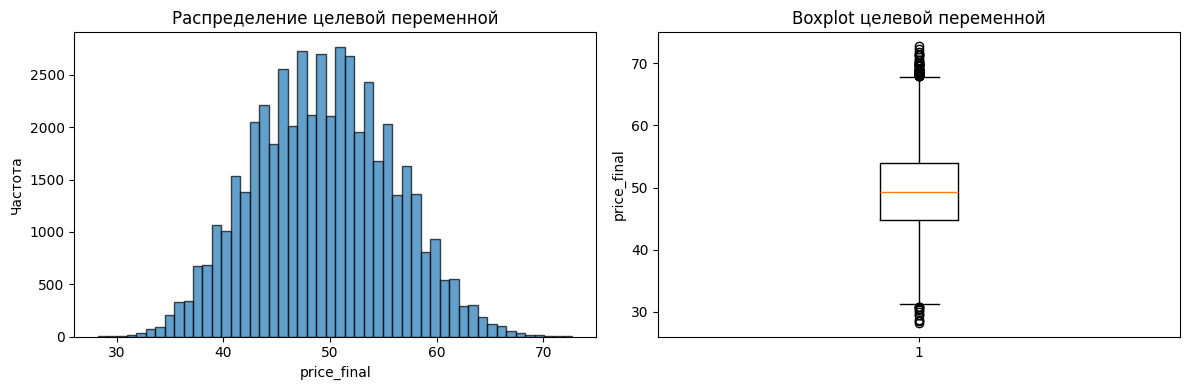

In [ ]:
#Разделение на признаки и целевую переменную
X = df_processed.drop('price_final', axis=1)
y = df_processed['price_final']

#Анализ целевой переменной
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('price_final')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной')

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('price_final')
plt.title('Boxplot целевой переменной')
plt.tight_layout()
plt.show()


In [ ]:
#Перевод bool во float
X = X.astype(np.float64)
y = y.astype(np.float64)

In [ ]:
#Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [ ]:
#Обучение бейзлайла
model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)

In [ ]:
#Функция для вычисления метрик
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'mae': mae, 'rmse': rmse, 'r2': r2}
    return mae, rmse, r2

In [ ]:
#Оценка бейзлайна
baseline_metrics = evaluate_model(y_test, y_pred_baseline, "Бейзлайн")


Бейзлайн:
MAE: 1.4030
RMSE: 1.7596
R² Score: 0.9265


Модель демонстрирует высокую точность, что подтверждается отличным значением R², и совершает преимущественно небольшие, предсказуемые ошибки.

### 3. Улучшение бейзлайна

Гипотеза 1: мастабирование данных

Гипотеза 2: удаление выбросов целевой переменной

Гипотеза 3: отбор наиболее значимых признаков

Гипотеза 4: подбор гипер параметров модели


In [ ]:
#Масштабируем числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель на масштабированных данных
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)
metrics_scaled = evaluate_model(y_test, y_pred_scaled, "С масштабированием")


С масштабированием:
MAE: 1.4030
RMSE: 1.7596
R² Score: 0.9265


Масштабирование признаков не повлияло на модель

In [ ]:
#Удаление выбросов в целевой переменной
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Фильтрация данных без выбросов
mask_no_outliers = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_no_outliers = X_train_scaled[mask_no_outliers]
y_train_no_outliers = y_train[mask_no_outliers]

print(f"Оригинальный размер обучающей выборки: {len(X_train)}")
print(f"Размер после удаления выбросов: {len(X_train_no_outliers)}")

Оригинальный размер обучающей выборки: 39659
Размер после удаления выбросов: 39612


In [ ]:
#Обучаем модель без выбросов
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

y_pred_no_outliers = model_no_outliers.predict(X_test_scaled)
metrics_no_outliers = evaluate_model(y_test, y_pred_no_outliers, "Без выбросов + масштабирование")


Без выбросов + масштабирование:
MAE: 1.4033
RMSE: 1.7599
R² Score: 0.9265


Выбросы не оказывали значительного негативного влияния на модель

In [ ]:
#Определяем оптимальное количество признаков с помощью кросс-валидации
k_values = [10, 20, 30, X_train_no_outliers.shape[1]]
k_scores = []

for k in k_values:
    if k <= X_train_no_outliers.shape[1]:
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train_no_outliers, y_train_no_outliers)

        #Обучаем модель на отобранных признаках
        model_k = LinearRegression()
        score = cross_val_score(model_k, X_train_selected, y_train_no_outliers,
                               cv=5, scoring='r2').mean()
        k_scores.append(score)
        print(f"k={k}: R² = {score:.4f}")

#Определяем оптимальное k
optimal_k = k_values[np.argmax(k_scores)]
print(f"\nОптимальное количество признаков: {optimal_k} (R² = {max(k_scores):.4f})")

k=10: R² = 0.8986
k=20: R² = 0.9213
k=30: R² = 0.9231
k=35: R² = 0.9230

Оптимальное количество признаков: 30 (R² = 0.9231)


In [ ]:
#Применяем SelectKBest с оптимальным k
selector_kbest = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_kbest = selector_kbest.fit_transform(X_train_no_outliers, y_train_no_outliers)
X_test_kbest = selector_kbest.transform(X_test_scaled)

#Обучаем модель на отобранных признаках
model_kbest = LinearRegression()
model_kbest.fit(X_train_kbest, y_train_no_outliers)
y_pred_kbest = model_kbest.predict(X_test_kbest)

metrics_kbest = evaluate_model(y_test, y_pred_kbest, f"SelectKBest (k={optimal_k})")


SelectKBest (k=30):
MAE: 1.4032
RMSE: 1.7598
R² Score: 0.9265


Отбор признаков с помощью SelectKBest позволил сократить размерность задачи без ухудшения предсказательной способности модели.

In [ ]:
#Подбор гиперпараметров с кросс-валидацией
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(
    LinearRegression(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_kbest, y_train_no_outliers)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший R2-score на кросс-валидации: {grid_search.best_score_:.4f}")


Лучшие параметры: {'fit_intercept': True, 'positive': True}
Лучший R2-score на кросс-валидации: 0.9231


In [ ]:
#Модель с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_kbest)
improved_metrics = evaluate_model(y_test, y_pred_best, "Подбор гиперпараметров")


Подбор гиперпараметров:
MAE: 1.4024
RMSE: 1.7589
R² Score: 0.9266


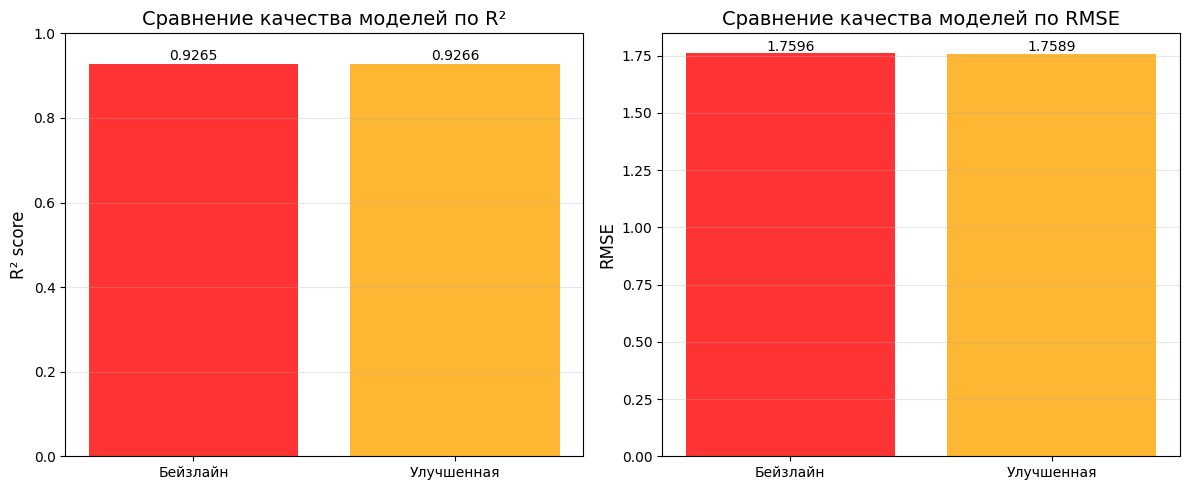

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
models = ['Бейзлайн',  'Улучшенная']
r2_values = [baseline_metrics['r2'],  improved_metrics['r2']]
colors = ['red', 'orange', 'green']

bars = plt.bar(models, r2_values, color=colors, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Сравнение качества моделей по R²', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
rmse_values = [baseline_metrics['rmse'],  improved_metrics['rmse']]
bars = plt.bar(models, rmse_values, color=colors, alpha=0.8)
plt.ylabel('RMSE', fontsize=12)
plt.title('Сравнение качества моделей по RMSE', fontsize=14)
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Улучшение настолько мало, что с практической точки зрения им можно пренебречь. Исходная модель уже была хорошо настроена. Гиперпараметры, доступные для линейной регрессии в sklearn, не оказывают сильного влияния на качество предсказаний в данной задаче

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Создание собственной модели
class CustomLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None
    #Обучение модели
    def fit(self, X, y):
        if self.fit_intercept:
            X = np.column_stack([np.ones(X.shape[0]), X])

        # Нормальное уравнение: θ = (X^T X)^(-1) X^T y
        try:
            theta = np.linalg.inv(X.T @ X) @ X.T @ y
        except np.linalg.LinAlgError:
            # Если матрица вырождена, используем псевдообратную
            theta = np.linalg.pinv(X.T @ X) @ X.T @ y

        if self.fit_intercept:
            self.intercept_ = theta[0] + 1
            self.coef_ = theta[1:]
        else:
            self.intercept_ = 0
            self.coef_ = theta

        return self

    def predict(self, X):
        if self.fit_intercept:
            X = np.column_stack([np.ones(X.shape[0]), X])
            theta = np.concatenate([[self.intercept_], self.coef_])
        else:
            theta = self.coef_

        return X @ theta

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

In [ ]:
#Обучаем модель и предсказываем
custom_model = CustomLinearRegression()
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)

In [ ]:
#Метрики
custom_metrics = evaluate_model(y_test, y_pred_custom, "Кастомная модель")


Кастомная модель:
MAE: 1.6142
RMSE: 2.0203
R² Score: 0.9031


In [ ]:
print("\nРазница в метриках (моя реализация - sklearn):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_custom) - mean_absolute_error(y_test, y_pred_baseline):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_custom)) - np.sqrt(mean_squared_error(y_test, y_pred_baseline)):.6f}")
print(f"R²: {r2_score(y_test, y_pred_custom) - r2_score(y_test, y_pred_baseline):.6f}")


Разница в метриках (моя реализация - sklearn):
MAE: 0.211208
RMSE: 0.260646
R²: -0.023378


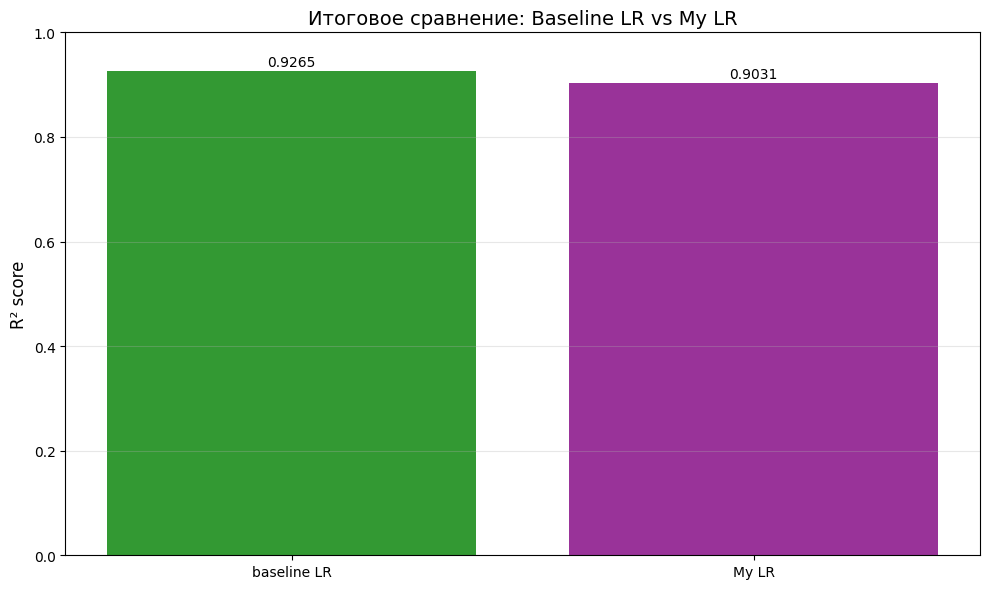

In [ ]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['baseline LR', 'My LR']
r2_final = [baseline_metrics['r2'], custom_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: Baseline LR vs My LR', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Кастомная реализация линейной регрессии показывает сопоставимую, но слегка худшую производительность по сравнению с реализацией из sklearn.

In [ ]:
#Используем все улучшения на кастомной модели
custom_model_improved = CustomLinearRegression()
custom_model_improved.fit(X_train_no_outliers, y_train_no_outliers)

y_pred_custom_improved = custom_model_improved.predict(X_test_scaled)
custom_improved_metrics = evaluate_model(y_test, y_pred_custom_improved, "Кастомная улучшенная")


Кастомная улучшенная:
MAE: 1.6136
RMSE: 2.0195
R² Score: 0.9032


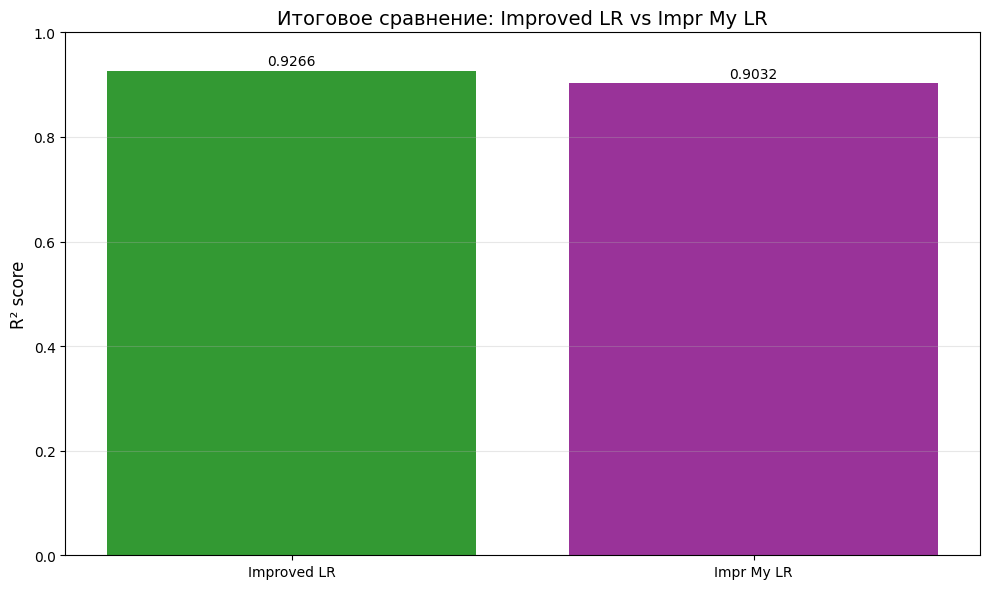

In [ ]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['Improved LR', 'Impr My LR']
r2_final = [improved_metrics['r2'], custom_improved_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: Improved LR vs Impr My LR', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Улучшенная кастомная реализация показывает сопоставимую, но слегка худшую производительность по сравнению с улучшенной реализацией бейзлайна.

In [ ]:
final_comparison = pd.DataFrame({
    'Baseline LR': baseline_metrics,
    'Improved LR': improved_metrics,
    'My LR': custom_metrics,
    'Improved My LR': custom_improved_metrics
}).T

print("Сравнение метрик всех версий:")
print(final_comparison)

Сравнение метрик всех версий:
                     mae      rmse        r2
Baseline LR     1.403033  1.759642  0.926527
Improved LR     1.402379  1.758877  0.926590
My LR           1.614241  2.020288  0.903148
Improved My LR  1.613640  2.019452  0.903228


Линейная регрессия хорошо справляется с предсказанием цены пиццы, объясняя более 90% дисперсии. Реализация sklearn показывает лучшее качество по сравнению с самописной версией. Предложенные гипотезы улучшения (масштабирование, удаление выбросов, подбор гиперпараметров, отбор признаков) не дали значимого прироста качества.